<a href="https://colab.research.google.com/github/alonba/eeg-bss/blob/main/FastICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mne
!pip install pymatreader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 4.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


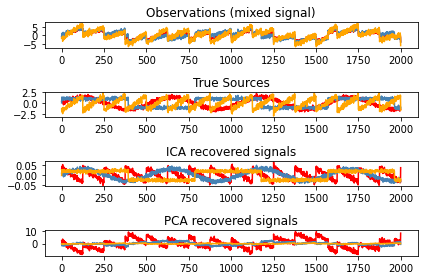

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(3 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(2 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(4 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [3]:
import mne as mne
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA

In [5]:
eeglab_epochs = mne.io.read_epochs_eeglab('/content/filtered_bad_epochs_removed.set')

Extracting parameters from /content/filtered_bad_epochs_removed.set...
Not setting metadata
473 matching events found
No baseline correction applied
0 projection items activated
Ready.


In [6]:
# ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica = mne.preprocessing.ICA(n_components=35)  # Defaults to FastICA
ica.fit(eeglab_epochs)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


<ipython-input-6-bb455c911f3b>:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(eeglab_epochs)


Selecting by number: 35 components
Fitting ICA took 28.9s.


Method,fastica
Fit,56 iterations on epochs (283800 samples)
ICA components,35
Explained variance,100.0 %
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


In [8]:
fitted_ica = ica.copy()

In [12]:
ica.apply(eeglab_epochs)


Applying ICA to Epochs instance
    Transforming to ICA space (35 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components


Number of events,473
Events,S 1: 145S 2: 160S 4: 168
Time range,-0.200 – 0.998 sec
Baseline,off


In [13]:
fitted_ica.plot_components()

RuntimeError: ignored